### Handling Missing values

In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('C:\\Users\\Siddharth\\Documents\\100 days of ML\\SafeDriverPrediction\\train.csv',na_values="-1")

In [4]:
test=pd.read_csv('C:\\Users\\Siddharth\\Documents\\100 days of ML\\SafeDriverPrediction\\test.csv',na_values="-1")

In [9]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [44]:
test.head()

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0,0,1.0,8,1.0,0.0,0,1,0,0,...,1,1,1,12,0,1,1,0,0,1
1,1,4,2.0,5,1.0,0.0,0,0,0,1,...,2,0,3,10,0,0,1,1,0,1
2,2,5,1.0,3,0.0,0.0,0,0,0,1,...,4,0,2,4,0,0,0,0,0,0
3,3,0,1.0,6,0.0,0.0,1,0,0,0,...,5,1,0,5,1,0,1,0,0,0
4,4,5,1.0,7,0.0,0.0,0,0,0,1,...,4,0,0,4,0,1,1,0,0,1


In [11]:
data.shape

(595212, 59)

In [16]:
data.isna().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15              0
ps_calc_01             0


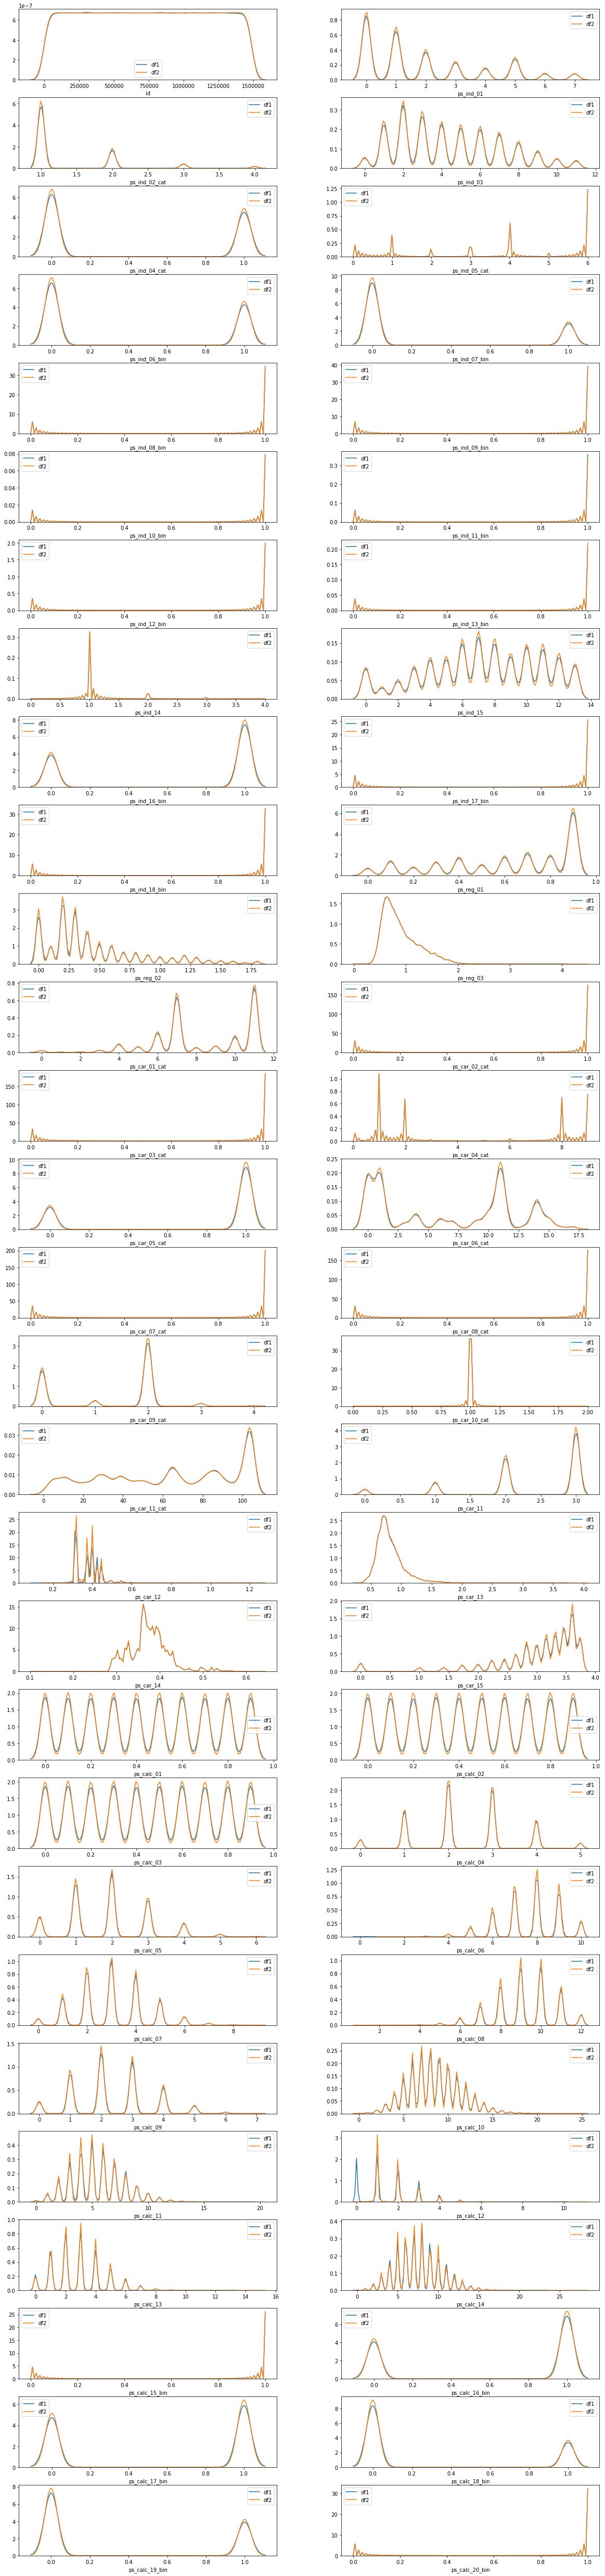

In [11]:
%matplotlib inline
import seaborn as sns
import matplotlib.gridspec as gs
import matplotlib.pyplot as plt
import itertools

def distComparison(df1, df2):
    a = len(df1.columns)
    if a%2 != 0:
        a += 1
    
    n = np.floor(np.sqrt(a)).astype(np.int64)
    
    while a%n != 0:
        n -= 1
    
    m = (a/n).astype(np.int64)
    coords = list(itertools.product(list(range(m)), list(range(n))))
    
    numerics = df1.select_dtypes(include=[np.number]).columns
    cats = df1.select_dtypes(include=['category']).columns
    
    fig = plt.figure(figsize=(20, 90))
    axes = gs.GridSpec(m, n)
    axes.update(wspace=0.25, hspace=0.25)
    
    for i in range(len(numerics)):
        x, y = coords[i]
        ax = plt.subplot(axes[x, y])
        col = numerics[i]
        sns.kdeplot(df1[col].dropna(), ax=ax, label='df1').set(xlabel=col)
        sns.kdeplot(df2[col].dropna(), ax=ax, label='df2')
        
    for i in range(0, len(cats)):
        x, y = coords[len(numerics)+i]
        ax = plt.subplot(axes[x, y])
        col = cats[i]

        df1_temp = df1[col].value_counts()
        df2_temp = df2[col].value_counts()
        df1_temp = pd.DataFrame({col: df1_temp.index, 'value': df1_temp/len(df1), 'Set': np.repeat('df1', len(df1_temp))})
        df2_temp = pd.DataFrame({col: df2_temp.index, 'value': df2_temp/len(df2), 'Set': np.repeat('df2', len(df2_temp))})

        sns.barplot(x=col, y='value', hue='Set', data=pd.concat([df1_temp, df2_temp]), ax=ax).set(ylabel='Percentage')
        
distComparison(data.drop('target',1), test)
        


In [7]:
def describe_missing_values(df):
    na_percent = {}
    N = df.shape[0]
    for column in df:
        na_percent[column] = df[column].isnull().sum() * 100 / N

    na_percent = dict(filter(lambda x: x[1] != 0, na_percent.items()))
    plt.bar(range(len(na_percent)), na_percent.values())
    plt.ylabel('Percent')
    plt.xticks(range(len(na_percent)), na_percent.keys(), rotation='vertical')
    plt.show()

Missing values for Train dataset


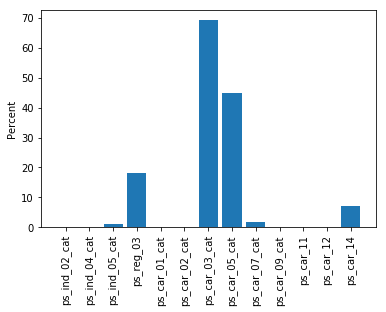

Missing values for Test dataset


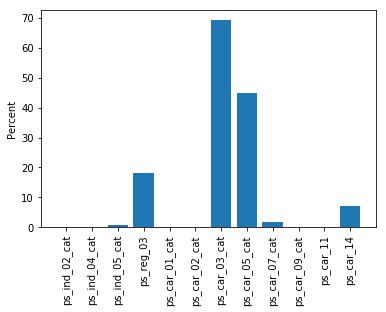

In [27]:
import matplotlib.pyplot as plt
print("Missing values for Train dataset")
describe_missing_values(data)

print("Missing values for Test dataset")
describe_missing_values(test)

In [5]:
cat_cols = [col for col in data.columns if 'cat' in col]
bin_cols = [col for col in data.columns if 'bin' in col]
con_cols = [col for col in data.columns if col not in bin_cols + cat_cols]

for col in cat_cols:
    data[col].fillna(value=data[col].mode()[0], inplace=True)
    test[col].fillna(value=test[col].mode()[0], inplace=True)
    
for col in bin_cols:
    data[col].fillna(value=data[col].mode()[0], inplace=True)
    test[col].fillna(value=test[col].mode()[0], inplace=True)

Missing values for Train dataset


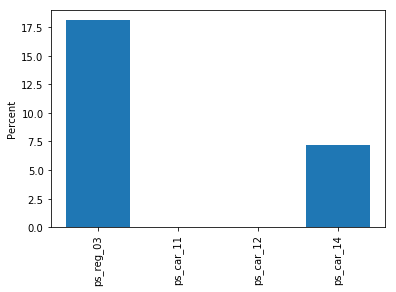

Missing values for Test dataset


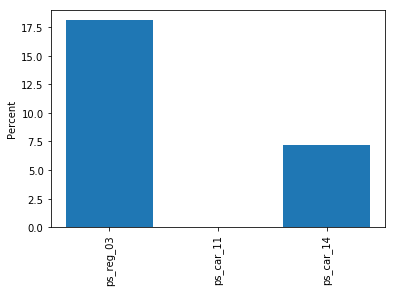

In [29]:
import matplotlib.pyplot as plt
print("Missing values for Train dataset")
describe_missing_values(data)

print("Missing values for Test dataset")
describe_missing_values(test)

### Missing at Random?
##### MCAR = missing completely at random.

##### In essence, if we split the data into two more sets. Data missing and Data present. 
##### Then check whether the distribution of the variables in each of these sets is the same, we can assume the data is missing completely at random.

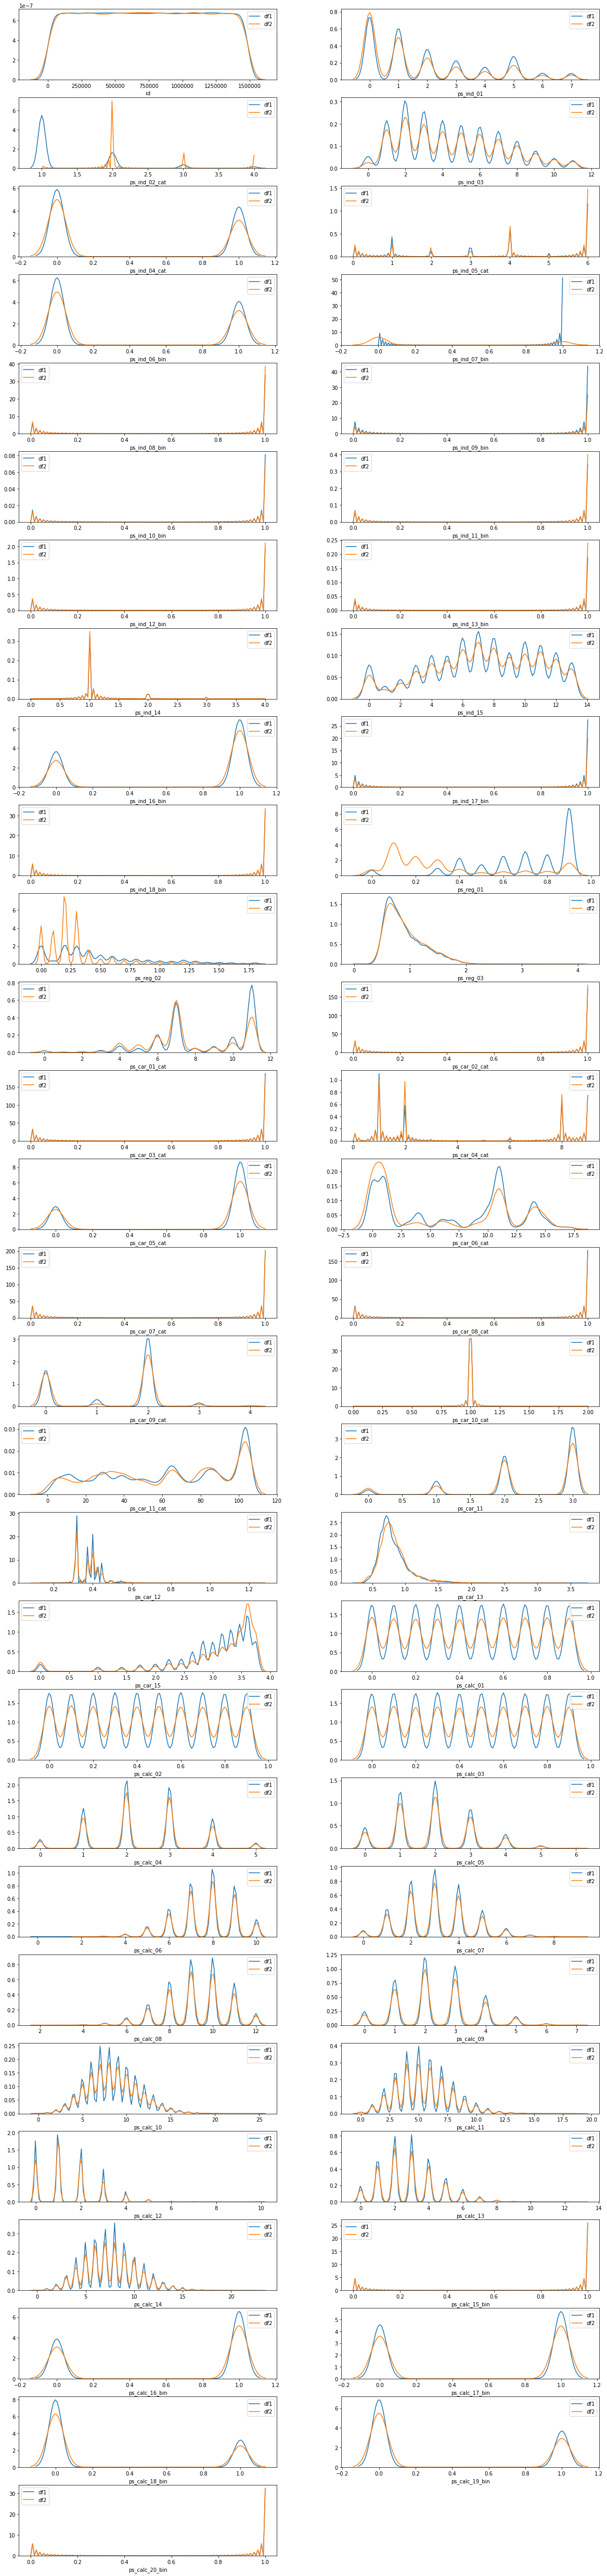

In [19]:

present = data.dropna().drop('ps_reg_03', 1)
present = data.dropna().drop('ps_car_14', 1)
missing = data[data.isnull().any(axis=1)].drop('ps_reg_03', 1)
missing = data[data.isnull().any(axis=1)].drop('ps_car_14', 1)

distComparison(present.drop('target', 1), missing.drop('target', 1))

##### It looks like we can't verify the MCAR assumption. The explanation here seems to be that we're less likely to know the reason for missing values
##### Note: It would be better to use a more objective measure of MCAR such as Little's test, might do in the future.

#### Baseline model
##### Use no ps_reg_03 and ps_car_14 data at all. Standard model will be a Random Forest Classifier with the displayed parameters, all test error estimates are obtained through a 10-fold Cross Validation.

In [13]:
missing.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],
      dtype='

In [31]:
data.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,...,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.359668,4.423318,0.416934,0.414948,0.393742,0.257033,0.163921,...,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.663108,2.699902,0.493052,1.344050,0.488579,0.436998,0.370205,...,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.115549e+06,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.488027e+06,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
np.isnan(data_1).sum()


id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


In [40]:
# Filling NAs in train dataset with interpolate
from sklearn.preprocessing import Imputer
z=Imputer(missing_values=np.nan, strategy='mean', axis=1).fit_transform(data)
data = pd.DataFrame(data=z,columns=data.columns.values)
print(data.isnull().sum()[data.isnull().sum() > 0])

Series([], dtype: int64)


In [52]:
data_1=data[:75000]

In [14]:
## Good code to extract categorical column names and numerical column names

numeric_var = [key for key in dict(data.dtypes)
                   if dict(data.dtypes)[key]
                       in ['float64','float32','int32','int64']] # Numeric Variable

cat_var = [key for key in dict(data.dtypes)
             if dict(data.dtypes)[key] in ['object'] ] # Categorical Varible

#### Baseline Model
##### Use no ps_reg_03 and ps_car_14 data at all. Standard model will be a Random Forest Classifier with the displayed parameters, all test error estimates are obtained through a 10-fold Cross Validation.

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


Xcol = [ 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin']
Ycol = 'target'

X = data_1.loc[:, Xcol]
Y = data_1.loc[:, Ycol]

Xbase = X
Ybase = Y

rf = RandomForestClassifier(n_estimators=1000,
                           max_depth=None,
                           min_samples_split=10)

baseline_err = cross_val_score(rf, X, Y, cv=10, n_jobs=-1).mean()
print("[BASELINE] Estimated RF Test Error (n = {}, 10-fold CV): {}".format(len(X), baseline_err))


[BASELINE] Estimated RF Test Error (n = 75000, 10-fold CV): 0.9632800065886815


#### Deletion

In [11]:
Xdel = data_1.dropna().loc[:, Xcol + ['ps_reg_03']+['ps_car_14']]
Ydel = data_1.dropna().loc[:, Ycol]

deletion_err = cross_val_score(rf, Xdel, Ydel, cv=10, n_jobs=-1).mean()
print("[DELETION] Estimated RF Test Error (n = {}, 10-fold CV): {}".format(len(Xdel), deletion_err))

[DELETION] Estimated RF Test Error (n = 57022, 10-fold CV): 0.9610150537731312


#### Mean Subsitution

In [30]:
data_1.ps_reg_03 = data_1.ps_reg_03.fillna(data_1.ps_reg_03.mean(skipna=True))
data_1.ps_car_14 = data_1.ps_car_14.fillna(data_1.ps_car_14.mean(skipna=True))

Xcol = Xcol + ['ps_reg_03'] +['ps_car_14']

Xmean = data_1.loc[:, Xcol]
Ymean = data_1.loc[:, Ycol]

mean_err = cross_val_score(rf, Xmean, Ymean, cv=10, n_jobs=-1).mean()
print("[MEAN] Estimated RF Test Error (n = {}, 10-fold CV): {}".format(len(Xmean), mean_err))

C:\Users\Siddharth\Anaconda3\lib\site-packages\pandas\core\generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


[MEAN] Estimated RF Test Error (n = 75000, 10-fold CV): 0.9632800065886815


In [33]:
data_2 = data_1.dropna()

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.multioutput import MultiOutputRegressor

Xrcol = [ 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_15',
       'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05',
       'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10',
       'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin']
Yrcol = ['ps_reg_03','ps_car_14']

X_reg = data_2.loc[:, Xrcol]
Y_reg = data_2.loc[:, Yrcol]

linear = LinearRegression()
multi_linear = MultiOutputRegressor(linear,n_jobs=-1)
multi_linear.fit(X_reg, Y_reg)
abs_residuals = np.absolute(Y_reg - multi_linear.predict(X_reg))


In [49]:
nan_inds_1 = data_1.ps_reg_03.isnull().nonzero()[0]
nan_inds_2 = data_1.ps_car_14.isnull().nonzero()[0]
data2 = data_1.copy()

for i, j in nan_inds_1,nan_inds_2:
    data_1.set_value(i, 'ps_reg_03', multi_linear.predict(data_1.loc[i, Xrcol].values.reshape(1, -1)))
    data_1.set_value(j, 'ps_car_14', multi_linear.predict(data_1.loc[j, Xrcol].values.reshape(1, -1)))
    
    
Xreg = data_1.loc[:, Xcol]
Yreg = data_1.loc[:, Ycol]
    
reg_err = cross_val_score(rf, Xreg, Yreg, cv=10, n_jobs=-1).mean()
print("[DETERMINISTIC REGRESSION] Estimated RF Test Error (n = {}, 10-fold CV): {}".format(len(Xreg), reg_err))

ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
for i, j in nan_inds_1,nan_inds_2:
    detreg = multi_linear.predict(data2.loc[i, Xrcol].values.reshape(1, -1))
    randreg = np.random.normal(detreg, np.random.choice(abs_residuals))
    train_cl2.set_value(i, 'Age', randreg)
    
Xrandreg = train_cl2.loc[:, Xcol]
Yrandreg = train_cl2.loc[:, Ycol]
    
randreg_err = cross_val_score(rf, Xrandreg, Yrandreg, cv=10, n_jobs=-1).mean()
print("[RANDOM REGRESSION] Estimated RF Test Error (n = {}, 10-fold CV): {}".format(len(Xrandreg), randreg_err))

In [53]:
nan_inds_1 = data_1.ps_reg_03.isnull().nonzero()[0]

In [61]:
data_1=data[:75000]
data_1.isna().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
